In [ ]:
"""
Multi Particle Model #1
Asuki Yanagihara @ BSSG2019
書き下し版
"""

<img src="Model_scheme_1.png">

Design and Input

In [1]:
#Module input
import numpy as np
import tkinter
import tkinter.filedialog as tkFileDialog
import os
import pandas as pd
from scipy import optimize

OCV curve and Cell Stochiometry

In [2]:
#OCV input *GUIをつけたい
#Cathode

root = tkinter.Tk()
# topmost指定(最前面)
root.attributes('-topmost', True)
root.withdraw()
root.lift()
root.focus_force()

#iDir = r'C:/' #任意の場所から選択させたい場合↓を　initialdir=iDir にする
# parentを指定
filename_c_ocv = tkFileDialog.askopenfilename(parent=root, initialdir=os.getcwd()) #initialdir=os.getcwd()カレントからファイル選択　

ocv_raw_c = pd.read_csv(filename_c_ocv, sep='\t')
 
def func_c1(x, a, b, c, d, e, f, g, h, i, j, k, l):
    return (a + b*x**2 + c*x**4 + d*x**6 + e*x**8 + f*x**10)/(g + h*x**2 + i*x**4 + j*x**6 + k*x**8 + l*x**10)
 
fitpara_c=optimize.curve_fit(func_c1, ocv_raw_c['x'], ocv_raw_c['Potential(V)'])

a_c=fitpara_c[0][0]
b_c=fitpara_c[0][1]
c_c=fitpara_c[0][2]
d_c=fitpara_c[0][3]
e_c=fitpara_c[0][4]
f_c=fitpara_c[0][5]
g_c=fitpara_c[0][6]
h_c=fitpara_c[0][7]
i_c=fitpara_c[0][8]
j_c=fitpara_c[0][9]
k_c=fitpara_c[0][10]
l_c=fitpara_c[0][11]

def ocv_c(x):
    return (a_c + b_c*x**2 + c_c*x**4 + d_c*x**6 + e_c*x**8 + f_c*x**10)/(g_c + h_c*x**2 + i_c*x**4 + j_c*x**6 + k_c*x**8 + l_c*x**10)

#Cathode OCV equation
#x = ocv_raw_c['x']
#ocv_raw_c['est_V']=(a + b*x**2 + c*x**4 + d*x**6 + e*x**8 + f*x**10)/(g + h*x**2 + i*x**4 + j*x**6 + k*x**8 + l*x**10)
#↑＋_c

In [3]:
#OCV input *GUI
#Anode

root = tkinter.Tk()
# topmost指定(最前面)
root.attributes('-topmost', True)
root.withdraw()
root.lift()
root.focus_force()

#iDir = r'C:/' #任意の場所から選択させたい場合↓を　initialdir=iDir にする
# parentを指定
filename_a_ocv = tkFileDialog.askopenfilename(parent=root, initialdir=os.getcwd()) #initialdir=os.getcwd()カレントからファイル選択　

ocv_raw_a = pd.read_csv(filename_a_ocv, sep='\t')

#fit 
def func_a1(x, a, b, c, d, e, f, g, h, i, j, k, l):
    return a + b*x**1 + c*x**2 + d*x**3 + e*x**4 + f*x**5+ g*x**6 + h*x**7 + i*x**8 + j*x**9 + k*x**10 + l*x**11
 
fitpara_a=optimize.curve_fit(func_a1, ocv_raw_a['x'], ocv_raw_a['Potential(V)'])

a_a=fitpara_a[0][0]
b_a=fitpara_a[0][1]
c_a=fitpara_a[0][2]
d_a=fitpara_a[0][3]
e_a=fitpara_a[0][4]
f_a=fitpara_a[0][5]
g_a=fitpara_a[0][6]
h_a=fitpara_a[0][7]
i_a=fitpara_a[0][8]
j_a=fitpara_a[0][9]
k_a=fitpara_a[0][10]
l_a=fitpara_a[0][11]

#Anode OCV equation 
#x = ocv_raw_a['x']
def ocv_a(x):
    return a_a + b_a*x**1 + c_a*x**2 + d_a*x**3 + e_a*x**4 + f_a*x**5+ g_a*x**6 + h_a*x**7 + i_a*x**8 + j_a*x**9 + k_a*x**10 + l_a*x**11
#ocv_raw_a['est_V']=a + b*x**1 + c*x**2 + d*x**3 + e*x**4 + f*x**5+ g*x**6 + h*x**7 + i*x**8 + j*x**9 + k*x**10 + l*x**11
#↑＋_a

In [4]:
#Design Parameter input *GUI
Area = 700 #対抗Area [cm^2]
Loading_c = 18 #[mg/cm^2] 片面
Material_ratio_c = 0.95 #[ratio]
charge_c= Area * Loading_c * Material_ratio_c /1000 #[g] 
spec_dcap_c = 250 #Li = 0-1 [mAh/g] 
first_eff_c = 0.98 # [ratio]
theoretical_cap_c= spec_dcap_c * charge_c /1000 #[Ah]
L_pos = 100/1000/1000 #Cathode thickness　[m] #Densityから計算したいとこ

Loading_a = 9 #[mg/cm^2]　片面
Material_ratio_a = 0.92 #[ratio]
charge_a= Area * Loading_a * Material_ratio_a /1000 #[g] 
spec_dcap_a = 360 #Li = 0-1 [mAh/g] 
first_eff_loss = 20 #[mAh/g]
theoretical_cap_a= spec_dcap_a * charge_a /1000 #[Ah]
L_neg = 100/1000/1000 #Anode thickness [m] #Densityから計算したいとこ

L_sep = 20/1000/1000 #Separator Thickness [m] #Porosity なども

In [5]:
#Cell stoichiometry
Full_charge_cell_voltage=4.48 #[V]
Full_charge_potential_c=4.5 #[V]
Full_charge_potential_a=Full_charge_potential_c - Full_charge_cell_voltage#[V]

#Cathode Li amount at SOC100
def full_c(x):
    return Full_charge_potential_c - ocv_c(x)
full_x_c = optimize.fsolve(full_c, 0.5) # 0.5→Fitting 初期値

#Anode Li amount at SOC100
def full_a(x):
    return Full_charge_potential_a - ocv_a(x)
full_x_a = optimize.fsolve(full_a, 0.5) 


In [6]:
#Cell OCV
Capacity=np.linspace(0, theoretical_cap_a, 500)
x_c = np.linspace(full_x_c, 0, 500)
x_a = np.linspace(full_x_a, 0, 500)
cell_ocv=pd.DataFrame()
cell_ocv['Capacity[Ah]']=Capacity
cell_ocv['x_c']=x_c
cell_ocv['x_a']=x_a
cell_ocv['cathode potential[V]']=ocv_c(x_c)
cell_ocv['anode potential[V]']=ocv_a(x_a)
cell_ocv['cell potential[V]']=cell_ocv['cathode potential[V]']-cell_ocv['anode potential[V]']
cell_ocv.head() #確認

,Capacity[Ah],x_c,x_a,cathode potential[V],anode potential[V],cell potential[V]
0,0.000000,0.725124,0.833861,4.500000,0.020000,4.480000
1,0.004181,0.723671,0.832190,4.498521,0.026991,4.471530
2,0.008363,0.722218,0.830519,4.497022,0.033275,4.463747
3,0.012544,0.720765,0.828848,4.495504,0.038909,4.456595
4,0.016726,0.719312,0.827177,4.493966,0.043946,4.450020


type(fig): <class 'matplotlib.figure.Figure'>


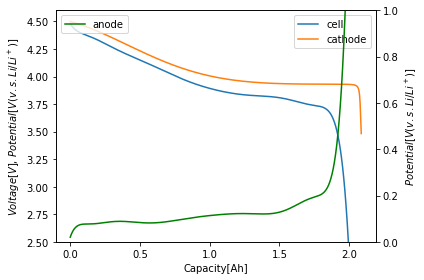

In [8]:
#グラフで確認
#1 Figureのインスタンス作成
import matplotlib.pyplot as plt
fig = plt.figure() #figsize=(16,9))
print("type(fig): {}".format(type(fig))) #わからん

#2 Axesのインスタンス作成
#ax3 = fig.add_subplot(121)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

#3 データを渡してプロット
ax1.plot(cell_ocv['Capacity[Ah]'], cell_ocv['cell potential[V]'], label='cell')
ax1.plot(cell_ocv['Capacity[Ah]'], cell_ocv['cathode potential[V]'], label='cathode')
ax2.plot(cell_ocv['Capacity[Ah]'], cell_ocv['anode potential[V]'], label='anode', color='g')


ax1.set_xlabel("Capacity[Ah]")
ax1.set_ylabel("$Voltage[V]$, $Potential [V (v.s. Li/Li^+)]$")
ax1.set_ylim(2.5, 4.6)
ax2.set_ylabel("$Potential [V (v.s. Li/Li^+)]$")
ax2.set_ylim(0.0, 1)

ax1.legend()
ax2.legend()

fig.tight_layout() #かぶり

plt.show()
#ax2.plot(x, trajectories)

Physical Parameter

In [9]:
#Physical Parameter　input　*GUI
sigma_eff_neg = 100 #electronic conductivity of Electrode Solid Phase[S/m]
a_neg = 1 #Specific Surface Area of Electrode[m^2/m^3]
F = 96500 #Faraday constant [C/mol =sec A / mol]
t_p = 0.4 #transport number

Simulation Condition

In [10]:
#Simulation Condition *GUI
Neg_grid_num = 50 #負極のGrid数
x_neg_array_1 = np.linspace(0, L_neg, Neg_grid_num) #xの配列
dx_neg = L_neg/Neg_grid_num #負極の1Gridの長さ[m]
x_neg_array_2 = np.linspace((0+dx_neg)/2, (L_neg-dx_neg/2), (Neg_grid_num-1) )#xの配列 中間点
dt = 10 #時間離散 [sec] 

Charge discharge Condition *GUI

In [11]:
#Charge discharge Condition *GUI
Current = 1 #[A]
I = Current/Area
Time = 60*2*0.8 #放電時間[sec] 60min+0.5C充電+DOD80%

Simulator

In [ ]:
#Setting 14 Variables 
"""
J_Li_neg = #(x, t) #0<x<L_neg
J_Li_pos #(x, t) # L_pos<x<L
U_neg #(x, t) # 0<x<L_neg
U_pos #(x, t) # L_pos<x<L
phi_e_neg #(x, t) #0<x<L_neg
phi_e_sep #(x, t) #L_neg<x<L_pos
phi_e_pos #(x, t) #L_pos<x<L
Ce_neg #(x, t) #0<x<L_neg
Ce_sep #(x, t) #L_neg<x<L_pos
Ce_pos #(x, t) #L_pos<x<L
phi_s_neg #(x, t) #0<x<L_neg
phi_s_pos #(x, t) #L_pos<x<L
Cs_neg #(x, r, t) #0<r<R_neg, 0<x<L_neg
Cs_pos #(x, r, t) #0<r<R_pos, L_pos<x<L
"""

\1. Calclulate Phi_s and J_Li  
Solid_phase_Charge_Conservation
\begin{equation*}
\sigma_{eff}\frac{\partial^2\phi_s(x, t)}{\partial x^2} = a_{neg}FJ_{Li}(x, t)\\
\sigma_{eff}\frac{\partial^2\phi_s(x, t)}{\partial x^2} = \sigma_{eff} \left(\frac{\phi_s(x+\Delta x)-2\phi_s(x)+\phi_s(x-\Delta x)}{\Delta x^2}\right)=a_{neg}FJ_{Li}(x, t)
\end{equation*}
Boundry Condition
\begin{equation*}
- \sigma_{eff}\frac{\partial \phi_s}{\partial x} \vert _{x=0} = I \\
- \sigma_{eff}\frac{\partial \phi_s}{\partial x} \vert _{x=L_{neg}} = 0 \\
\end{equation*}

In [ ]:
###TODO###
#正極側のSolid phase potentialもやる。

In [77]:
#initial value
#Tentative Variables 
phi_s_neg_value = np.zeros(Neg_grid_num-1) #[V]
d_phi_s_neg_dx_value = np.zeros(Neg_grid_num ) #[A/cm^2]
J_Li_neg_value = np.full(Neg_grid_num-1, I*t_p) #[mol m^-2 sec-1]
#二次元配列化
phi_s_neg=np.array([x_neg_array_2, phi_s_neg_value]) #二次元配列化
d_phi_s_neg_dx=np.array([x_neg_array_1, phi_s_neg_value]) #二次元配列化
J_Li_neg=np.array([x_neg_array_2, phi_s_neg_value]) #二次元配列化

In [ ]:
#phi_s_negの計算



In [ ]:
def solid_charge(t):
     = J_Li

In [53]:
#関数部
def solid_charge(phi_s_neg):
    J_Li_neg = sigma_eff_neg*((d_phi_s_neg_dx[2:] - d_phi_s_neg_dx[0:-2])/ dx_neg) / a_neg / F 
    return J_Li_neg

#境界条件
d_phi_s_neg_dx[0]= -I / sigma_eff_neg * dx_neg
d_phi_s_neg_dx[:0]=0

#実行 J_Li_neg(x, t)の算出
solid_charge(phi_s_neg)

array([1.4803849e-08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00])

In [49]:
#関数部
def solid_charge(phi_s_neg):
    J_Li_neg = sigma_eff_neg*((phi_s_neg[2:] - 2* phi_s_neg[1:-1] + phi_s_neg[0:-2])/ dx_neg**2) / a_neg / F 
    return J_Li_neg

#境界条件
phi_s_neg[1]= phi_s_neg[0]*( -I / sigma_eff_neg * dx_neg)
phi_s_neg[:0]=phi_s_neg[:-1]

#実行 J_Li_neg(x, t)の算出
solid_charge(phi_s_neg)

ValueError: could not broadcast input array from shape (49) into shape (0)

\2. Calculate Ce_neg and phi_e_neg

Conservation of Species in Electrolyte Phase
\begin{equation*}
\varepsilon_e \frac{\partial}{\partial t}C_e(x, t) = D_e^{eff}\left(\frac{\partial^2C_e(x, t)}{\partial x^2}\right) + a_{neg}(1-t_+)J_{Li}(x,t)
\end{equation*}
↓まだ
\begin{equation*}
\frac{\partial}{\partial t}\ C_e(x, t)　= \frac{D_e^{eff}}{\varepsilon_e} \left(\frac{C_e(x+\Delta x ) - 2C_e(x) + C_e(x - \Delta x)}{\Delta x^2}   \right)
+ a_{neg}(1-t_+)J_{Li}(x,t)
\end{equation*}

Electrolyte Charge Consevaretion
\begin{equation*}
-\sigma_{eff}\frac{\partial \phi_s(x, t)}{\partial x} - \kappa_{eff}\frac{\partial \phi_e(x, t)}{\partial x} 
+ \frac{2\kappa_{eff}RT}{F}(0.5-t_+)\frac{\partial lnC_e(x, t)}{\partial x} = I
\end{equation*}

\3. Calculate Cs

Solid Phase Diffusion
\begin{equation*}
  \frac{\partial C_s(r, t)}{\partial t} = D_s\left(\frac{2}{r}\frac{\partial C_s(r, t)}{\partial r}+\frac{\partial^2 C_s(r, t)}{\partial r^2}\right)
\end{equation*}

Boundry Condition
\begin{equation*}
\frac{\partial C_s}{\partial r} \vert _{r=0} = 0 \\
- D_s\frac{\partial C_s}{\partial r} \vert _{r=R(surface)} = J_{Li}(x, t) \\
\end{equation*}